## Setup stuff (don't edit)

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_classification, make_circles, make_moons, make_regression

### Datasets

In [2]:
num_data_points = 400

moons_data = make_moons(n_samples=num_data_points, noise=0.2, random_state=42)

classification_data = make_classification(n_samples=num_data_points, n_features=2,
                                          n_informative=2, n_redundant=0,
                                          class_sep=1,
                                          n_clusters_per_class=1,
                                          n_classes=2, random_state=42)

blobs_data = make_blobs(n_samples=num_data_points, centers=3, cluster_std=3,
                        n_features=2, random_state=42)

circle_data = make_circles(n_samples=num_data_points, factor=0.5, noise=0.1,
                           random_state=42)

datasets = [moons_data, classification_data, blobs_data, circle_data]

### Data Visualizing

In [3]:
# Visualize data as a scatter plot
def visualize_data(data):
    fig, ax = plt.subplots(figsize=(5, 5))
    X, y = data
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolor='k')
    ax.set_xlabel("Feature 1", fontsize=12)
    ax.set_ylabel("Feature 2", fontsize=12)
    plt.show()

In [4]:
# Visualize feature boundary in scatter plot
def visualize_boundary(X, y, model, acc):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolor='k')
    ax.set_title(f"Accuracy: {acc:.2f}")
    ax.set_xlabel("Feature 1", fontsize=12)
    ax.set_ylabel("Feature 2", fontsize=12)
    plt.show()

# Section 1: The Data

We've created 4 interestingly-shaped datasets for you: `moons_data`, `classification_data`, `blobs_data`, and `circle_data`. Use the `visualize_data` function provided above to display each dataset.

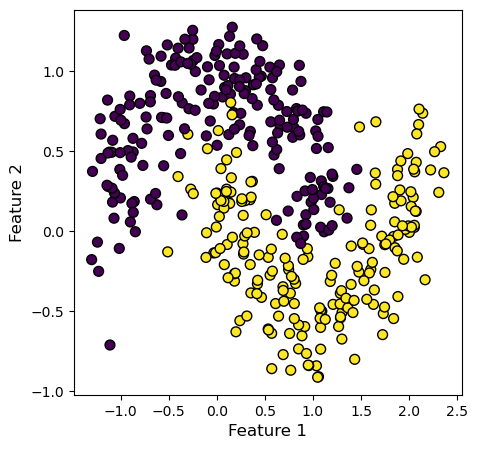

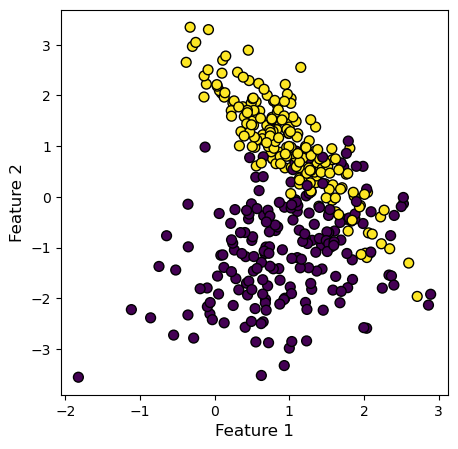

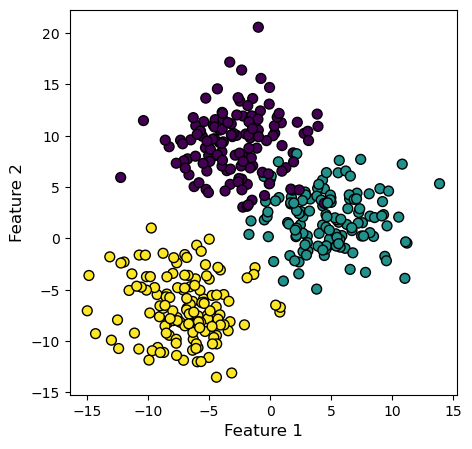

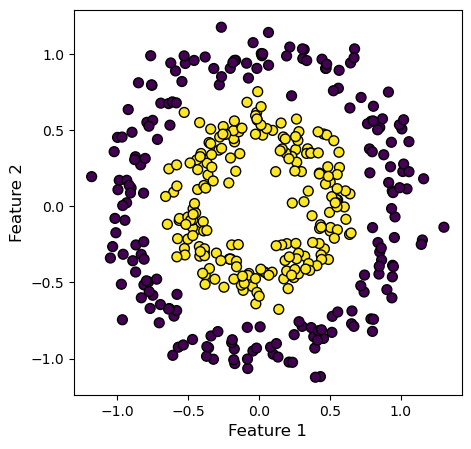

In [5]:
visualize_data(moons_data)
visualize_data(classification_data)
visualize_data(blobs_data)
visualize_data(circle_data)

# Section 2: Splitting The Data

Let's see what one of these datasets actually looks like and print out `moons_data`.

In [6]:
moons_data

(array([[-9.81803985e-02,  5.13760081e-01],
        [ 6.87466077e-01, -3.49250017e-01],
        [ 7.89057617e-01,  5.85324149e-01],
        [ 3.45189406e-01,  1.94938671e-01],
        [ 8.09959495e-02,  8.97496259e-01],
        [ 5.60858639e-01,  8.83422476e-01],
        [ 1.30252197e+00, -5.09156779e-01],
        [ 5.95754017e-02,  8.37531819e-01],
        [ 4.21759661e-01, -3.31941904e-01],
        [-4.29350534e-01,  1.08010108e+00],
        [ 9.26052295e-01,  1.00681218e-01],
        [ 1.87960323e+00,  3.84399639e-01],
        [ 4.76491468e-01,  1.15804821e+00],
        [ 1.83915421e-01,  9.53026337e-01],
        [-5.58735166e-01,  7.08185455e-01],
        [ 9.27937211e-01,  7.35502568e-01],
        [ 5.70811736e-01, -8.61707296e-01],
        [ 1.85079127e+00,  1.72668270e-01],
        [ 1.17744747e-01,  1.81096098e-01],
        [ 2.36238363e+00,  3.63553391e-01],
        [ 4.61336436e-01,  9.67211490e-01],
        [ 1.20657999e+00,  3.40876505e-01],
        [ 2.14185649e+00,  7.358

What do we notice? We have a tuple (pair of two items) with two arrays (lists) inside it. The first list stores sub-lists of length 2, and the second list has a bunch of 1s and 0s in it. 

Which list do you think is the features and which do you think is the target? Uncomment the appropriate line of code below.

In [7]:
X, y = moons_data

To split the data into training and test sets, we use the `train_test_split` function. Use [this documentation link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to get familiar with `train_test_split`. Scroll down on the page to see examples of the function being used in the code.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_train

array([[ 3.11975477e-01, -5.32480283e-01],
       [ 1.15857067e+00,  5.20774047e-01],
       [ 5.60858639e-01,  8.83422476e-01],
       [ 9.51833823e-02,  8.82265750e-01],
       [ 1.41548602e+00, -5.10659563e-01],
       [ 2.36238363e+00,  3.63553391e-01],
       [ 1.75060971e-01,  7.39232774e-01],
       [-1.08618198e+00,  1.80156788e-01],
       [-2.90796076e-01,  7.63916270e-01],
       [-2.08639782e-01,  1.08320192e+00],
       [ 1.73159879e+00, -5.17124264e-01],
       [ 6.52327867e-01,  6.91965663e-01],
       [-6.91073437e-01,  8.45913510e-01],
       [-1.08420599e+00,  5.66667527e-01],
       [ 1.12769291e+00, -5.53600850e-01],
       [ 1.91753941e-01,  1.11047366e+00],
       [-2.47399282e-01,  1.06518546e+00],
       [-1.12029762e+00,  4.92298655e-01],
       [ 2.05834156e+00,  3.69114987e-01],
       [ 3.47971960e-01,  6.22144299e-01],
       [ 2.14185649e+00,  7.35831661e-01],
       [ 2.26557827e+00,  4.95112630e-01],
       [ 1.63827064e+00, -3.69449337e-01],
       [ 7.

In [9]:
#@title Test case (DO NOT EDIT)
assert len(X_train) + len(X_test) == len(X), "Expected X_train and X_test to combine to X"
assert len(y_train) + len(y_test) == len(y), "Expected y_train and y_test to combine to y"
assert len(X_train) == len(X)*0.7, "Expected X_train to be 70% of X's size, got " + str(100*len(X_train)/len(X)) + "%"
assert len(X_test) == len(X)*0.3, "Expected X_test to be 30% of X's size, got " + str(100*len(X_test)/len(X)) + "%"
assert len(y_train) == len(y)*0.7, "Expected y_train to be 70% of y's size, got " + str(100*len(y_train)/len(y)) + "%"
assert len(y_test) == len(y)*0.3, "Expected y_test to be 30% of y's size, got " + str(100*len(y_test)/len(y)) + "%"

# Section 3: The Models

Let's test out some models to see which ones work best on the `moons_data` dataset. 
### Tree-Based Models
Use [this documentation link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to familiarize yourself with `DecisionTreeClassifier` and try it out. Scroll down to see how to use `fit` and `score`.

In [11]:
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
tree_score = tree_model.score(X_test, y_test)

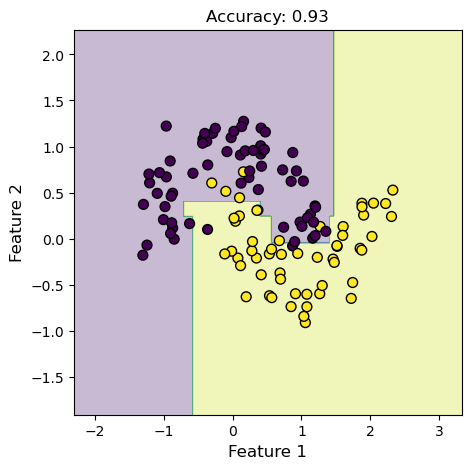

In [12]:
visualize_boundary(X_test, y_test, tree_model, tree_score)

[Text(0.40789473684210525, 0.9166666666666666, 'Feature 2 <= 0.247\n0.499\n280\n[135, 145]\nYellow'),
 Text(0.10526315789473684, 0.75, 'Feature 1 <= -0.575\n0.223\n141\n[18, 123]\nYellow'),
 Text(0.256578947368421, 0.8333333333333333, 'True  '),
 Text(0.05263157894736842, 0.5833333333333334, '0.0\n9\n[9, 0]\nPurple'),
 Text(0.15789473684210525, 0.5833333333333334, 'Feature 2 <= -0.048\n0.127\n132\n[9, 123]\nYellow'),
 Text(0.10526315789473684, 0.4166666666666667, '0.0\n83\n[0, 83]\nYellow'),
 Text(0.21052631578947367, 0.4166666666666667, 'Feature 1 <= 0.566\n0.3\n49\n[9, 40]\nYellow'),
 Text(0.15789473684210525, 0.25, '0.0\n22\n[0, 22]\nYellow'),
 Text(0.2631578947368421, 0.25, 'Feature 1 <= 1.416\n0.444\n27\n[9, 18]\nYellow'),
 Text(0.21052631578947367, 0.08333333333333333, '0.0\n9\n[9, 0]\nPurple'),
 Text(0.3157894736842105, 0.08333333333333333, '0.0\n18\n[0, 18]\nYellow'),
 Text(0.7105263157894737, 0.75, 'Feature 1 <= 1.47\n0.266\n139\n[117, 22]\nPurple'),
 Text(0.5592105263157895, 

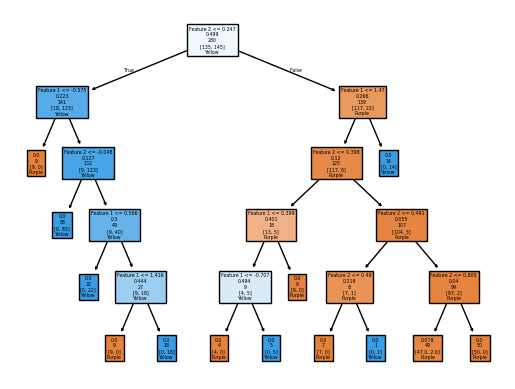

In [13]:
plot_tree(tree_model, feature_names=["Feature 1", "Feature 2"], class_names=["Purple", "Yellow"], label="none", filled=True)

### Linear Models
Use [this documentation link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to familiarize yourself with `LogisticRegression` and try it out. Scroll down to see how to use `fit` and `score`.

In [14]:
lr_model = LogisticRegression(C=0.1, random_state=42)
lr_model.fit(X_train, y_train)
lr_score = lr_model.score(X_test, y_test)

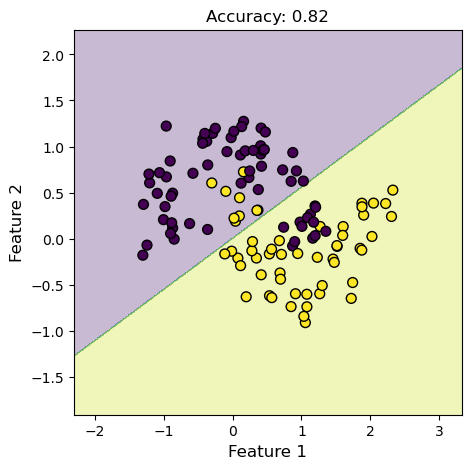

In [15]:
visualize_boundary(X_test, y_test, lr_model, lr_score)

### Non-Linear Models
Use [this documentation link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) to familiarize yourself with `SVC` (SVM RBF) and try it out. You can also try setting the kernel to `linear` to try out Linear SVM. Scroll down to see how to use `fit` and `score`.

In [16]:
svc_model = SVC(C=0.1, gamma=1, random_state=42)
# svc_model = SVC(kernel='linear', C=0.1, gamma=1, random_state=42)
svc_model.fit(X_train, y_train)
svc_score = svc_model.score(X_test, y_test)

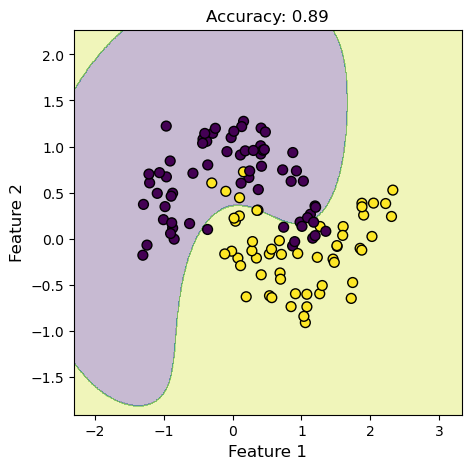

In [17]:
visualize_boundary(X_test, y_test, svc_model, svc_score)

Use [this documentation link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to familiarize yourself with `KNeighborsClassifier` (K-Nearest Neighbours) and try it out. Scroll down to see how to use `fit` and `score`.

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_score = knn_model.score(X_test, y_test)

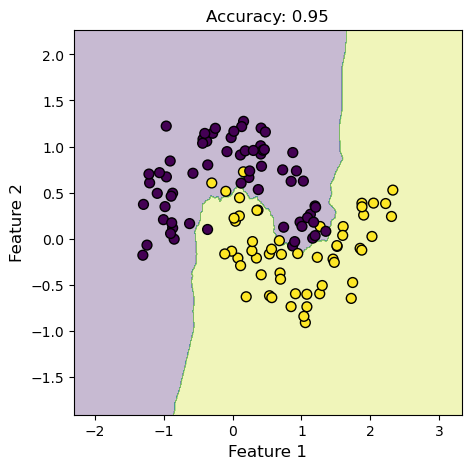

In [19]:
visualize_boundary(X_test, y_test, knn_model, knn_score)

# Section 4: Picking a Good Model


You might have noticed that, no matter how much you change the hyperparameters for a model, sometimes the model just doesn't fit the data that well. For example, if the purple dots form a curve, a line can only do so well at making a decision boundary. This is why we try to pick a model that will be able to form a good decision boundary on the data we're using.

Let's go back to the `classification_data`, `blobs_data`, and `circle_data` datasets. Consider the shape of the data in each dataset, and try to pick a model from the ones you explored above that you think will fit each dataset well. Don't forget to use `train_test_split` on each new dataset!
### `classification_data`

In [30]:
X, y = classification_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [21]:
#@title Test case (DO NOT EDIT)
assert len(X_train) + len(X_test) == len(X), "Expected X_train and X_test to combine to X"
assert len(y_train) + len(y_test) == len(y), "Expected y_train and y_test to combine to y"
assert len(X_train) == len(X)*0.7, "Expected X_train to be 70% of X's size, got " + str(100*len(X_train)/len(X)) + "%"
assert len(X_test) == len(X)*0.3, "Expected X_test to be 30% of X's size, got " + str(100*len(X_test)/len(X)) + "%"
assert len(y_train) == len(y)*0.7, "Expected y_train to be 70% of y's size, got " + str(100*len(y_train)/len(y)) + "%"
assert len(y_test) == len(y)*0.3, "Expected y_test to be 30% of y's size, got " + str(100*len(y_test)/len(y)) + "%"

In [28]:
classification_model = LogisticRegression(C=10, random_state=42)
classification_model.fit(X_train, y_train)
classification_score = classification_model.score(X_test, y_test)

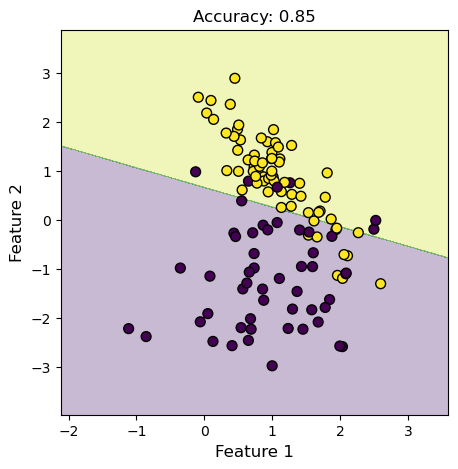

In [29]:
visualize_boundary(X_test, y_test, classification_model, classification_score)

### `blobs_data`

In [31]:
X, y = blobs_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [32]:
#@title Test case (DO NOT EDIT)
assert len(X_train) + len(X_test) == len(X), "Expected X_train and X_test to combine to X"
assert len(y_train) + len(y_test) == len(y), "Expected y_train and y_test to combine to y"
assert len(X_train) == len(X)*0.7, "Expected X_train to be 70% of X's size, got " + str(100*len(X_train)/len(X)) + "%"
assert len(X_test) == len(X)*0.3, "Expected X_test to be 30% of X's size, got " + str(100*len(X_test)/len(X)) + "%"
assert len(y_train) == len(y)*0.7, "Expected y_train to be 70% of y's size, got " + str(100*len(y_train)/len(y)) + "%"
assert len(y_test) == len(y)*0.3, "Expected y_test to be 30% of y's size, got " + str(100*len(y_test)/len(y)) + "%"

In [35]:
blobs_model = KNeighborsClassifier(n_neighbors=5)
blobs_model.fit(X_train, y_train)
blobs_score = blobs_model.score(X_test, y_test)
blobs_score

0.975

In [36]:
# Takes a WHILE to run
# visualize_boundary(X_test, y_test, blobs_model, blobs_score)

### `circle_data`

In [37]:
X, y = circle_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [38]:
#@title Test case (DO NOT EDIT)
assert len(X_train) + len(X_test) == len(X), "Expected X_train and X_test to combine to X"
assert len(y_train) + len(y_test) == len(y), "Expected y_train and y_test to combine to y"
assert len(X_train) == len(X)*0.7, "Expected X_train to be 70% of X's size, got " + str(100*len(X_train)/len(X)) + "%"
assert len(X_test) == len(X)*0.3, "Expected X_test to be 30% of X's size, got " + str(100*len(X_test)/len(X)) + "%"
assert len(y_train) == len(y)*0.7, "Expected y_train to be 70% of y's size, got " + str(100*len(y_train)/len(y)) + "%"
assert len(y_test) == len(y)*0.3, "Expected y_test to be 30% of y's size, got " + str(100*len(y_test)/len(y)) + "%"

In [39]:
circle_model = SVC(C=0.1, gamma=1, random_state=42)
circle_model.fit(X_train, y_train)
circle_score = circle_model.score(X_test, y_test)

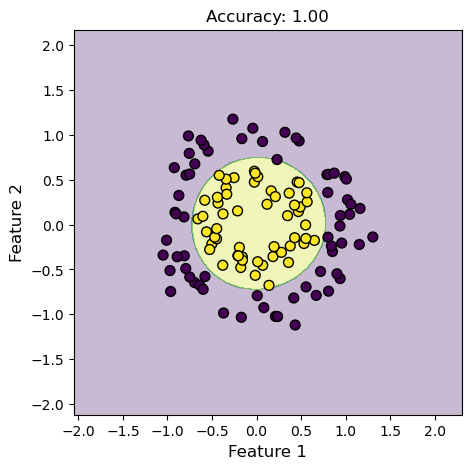

In [40]:
visualize_boundary(X_test, y_test, circle_model, circle_score)